# Pandas


> 80% of data analysis is spent on the process of cleaning and
preparing the data (Dasu and Johnson, *Exploratory data mining and data cleaning*, Wiley, 2003)

In [5]:
import numpy as np
import pandas as pd
pd.__version__
pd.set_option("display.notebook_repr_html", False)

In [2]:
# Pandas package defines 3 classes:
# Series - wrappers around numpy vectors, represent columns (variables)
# Index - similar to Series, but used to store row/column names
# DataFrame - sequences/dictionaries (container) of Series - represent tabular data

In [6]:
np.random.seed(123)
pd.DataFrame({ # a dict
        # key-column names, value-column vals
        "A": np.round(np.random.uniform(0, 1, 5), 2),
        "C": np.random.choice([True, False], 5, True, [0.4, 0.6]),
        "B": ["f", None, "f", "m", "f"]
    }) 
# lengths are identical!

      A     B      C
0  0.70     f  False
1  0.29  None  False
2  0.23     f  False
3  0.55     m  False
4  0.72     f   True

In [7]:
A = np.r_[:12].reshape(4, 3)
A

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [8]:
pd.DataFrame(A)

   0   1   2
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

In [9]:
pd.DataFrame(A, columns=["A", "B", "C"])

   A   B   C
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

In [10]:
pairs = [
    ("A", np.r_[8, 3, 4]),
    ("B", range(3)),
    ("C", ["aaa","bbb","cccccc"])
]

In [11]:
pd.DataFrame.from_items(pairs)

   A  B       C
0  8  0     aaa
1  3  1     bbb
2  4  2  cccccc

In [12]:
pd.DataFrame(pairs)

   0                   1
0  A           [8, 3, 4]
1  B           (0, 1, 2)
2  C  [aaa, bbb, cccccc]

In [15]:
birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv", comment="#")
birth_dates.head()

               Name   BirthDate
0    Hung Hyun-Seok  12.06.2000
1  Benno Blumenthal  31.12.1918
2  Paitoon Ornwimol  26.06.1958
3    P'yon Yong-Sun  10.07.1947
4    Étienne Chaney  04.09.1983

In [16]:
# useful args:
# decimal : str, default ‘.’ - Character to recognize as decimal point (e.g. use ‘,’ for European data).
# sep : str, default ‘,’ -    Delimiter to use. 

# birth_dates.to_csv()  - a method that writes a csv file

In [17]:
np.random.seed(123)
x = pd.DataFrame({
        "A": np.round(np.random.uniform(0, 1, 5), 2),
        "C": np.random.choice([True, False], 5, True, [0.4, 0.6]),
        "B": ["f", None, "f", "m", "f"]
    }) 
print(x)

      A     B      C
0  0.70     f  False
1  0.29  None  False
2  0.23     f  False
3  0.55     m  False
4  0.72     f   True


In [18]:
x.shape

(5, 3)

In [19]:
len(x)

5

In [20]:
for e in x: 
    # iterating over dataframes - iterating over column names
    print(e)

A
B
C


In [21]:
birth_dates.head(3)

               Name   BirthDate
0    Hung Hyun-Seok  12.06.2000
1  Benno Blumenthal  31.12.1918
2  Paitoon Ornwimol  26.06.1958

In [22]:
birth_dates.tail(4)

                 Name   BirthDate
128    Romualdo Marin  04.09.1982
129   Felicita Wilbur  07.06.1982
130  Kaminaga Ichibei  28.03.1996
131       Vania Toler  28.02.2000

In [23]:
x.dtypes

A    float64
B     object
C       bool
dtype: object

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
A    5 non-null float64
B    4 non-null object
C    5 non-null bool
dtypes: bool(1), float64(1), object(1)
memory usage: 165.0+ bytes


## Series

In [25]:
x["A"] # equivalently: x.get("A")

0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

In [26]:
type(x["A"])

pandas.core.series.Series

In [27]:
x.A # but x["A"] is preffered

0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

In [28]:
pd.DataFrame(x.A )

      A
0  0.70
1  0.29
2  0.23
3  0.55
4  0.72

In [29]:
pd.Series(np.r_[np.nan, 0:1:4j])

0         NaN
1    0.000000
2    0.333333
3    0.666667
4    1.000000
dtype: float64

In [30]:
x.A.values

array([ 0.7 ,  0.29,  0.23,  0.55,  0.72])

In [31]:
x.B.values

array(['f', None, 'f', 'm', 'f'], dtype=object)

In [32]:
x.C.values

array([False, False, False, False,  True], dtype=bool)

## date-time data

In [33]:
pd.Series(pd.date_range("2017-01-30", periods=3)) # freq="D"

0   2017-01-30
1   2017-01-31
2   2017-02-01
dtype: datetime64[ns]

In [34]:
pd.Series(pd.date_range("2017-01-30 10:30", periods=5, freq="60S")) 

0   2017-01-30 10:30:00
1   2017-01-30 10:31:00
2   2017-01-30 10:32:00
3   2017-01-30 10:33:00
4   2017-01-30 10:34:00
dtype: datetime64[ns]

In [35]:
pd.Series(pd.date_range("2017", "2018", freq="3M")) 

0   2017-01-31
1   2017-04-30
2   2017-07-31
3   2017-10-31
dtype: datetime64[ns]

In [36]:
birth_dates["BirthDate"].head()

0    12.06.2000
1    31.12.1918
2    26.06.1958
3    10.07.1947
4    04.09.1983
Name: BirthDate, dtype: object

In [37]:
# convert birth_dates["BirthDate"] to datetime
birth_dates["BirthDate"] = pd.to_datetime(birth_dates["BirthDate"])
birth_dates["BirthDate"].head()

0   2000-12-06
1   1918-12-31
2   1958-06-26
3   1947-10-07
4   1983-04-09
Name: BirthDate, dtype: datetime64[ns]

## Categorical data
 
 on nominal (qualitative) or ordinal (ordered) scales
 
 in R : factors

In [38]:
x.B

0       f
1    None
2       f
3       m
4       f
Name: B, dtype: object

In [39]:
x["B"] = pd.Series(x["B"], dtype="category") # x.B.astype("category")
x["B"]

0      f
1    NaN
2      f
3      m
4      f
Name: B, dtype: category
Categories (2, object): [f, m]

In [40]:
x.B.cat.codes

0    0
1   -1
2    0
3    1
4    0
dtype: int8

In [41]:
x.B.cat.categories

Index(['f', 'm'], dtype='object')

In [46]:
p = pd.Series(pd.Categorical(
        ["a", "c", "b", "a", "a", "c"],
        categories = ["c", "b", "a"],
        ordered = True
))
p

0    a
1    c
2    b
3    a
4    a
5    c
dtype: category
Categories (3, object): [c < b < a]

In [47]:
p.sort_values()

1    c
5    c
2    b
0    a
3    a
4    a
dtype: category
Categories (3, object): [c < b < a]

In [49]:
p.cat.categories = ["S", "M", "L"]
p

0    L
1    S
2    M
3    L
4    L
5    S
dtype: category
Categories (3, object): [S < M < L]

In [50]:
x.A

0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

In [52]:
pd.cut(x.A, np.r_[0, 0.5, 1], right=False)

0    [0.5, 1)
1    [0, 0.5)
2    [0, 0.5)
3    [0.5, 1)
4    [0.5, 1)
Name: A, dtype: category
Categories (2, object): [[0, 0.5) < [0.5, 1)]

In [54]:
pd.cut(x.A, np.r_[0, 0.5, 1], right=False, labels=["small", "large"])

0    large
1    small
2    small
3    large
4    large
Name: A, dtype: category
Categories (2, object): [small < large]

In [55]:
# categorical variables are used if we have #unique values << #observations
# we save space
# we save time (processing ints is faster than processing strings)
# we can set an arbitrary linear order on the set labels
# int representation might be convenient

tips = pd.read_csv("http://www.gagolewski.com/resources/data/tips.csv", comment="#")
tips.head()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [57]:
tips["sex"] = tips["sex"].astype("category")

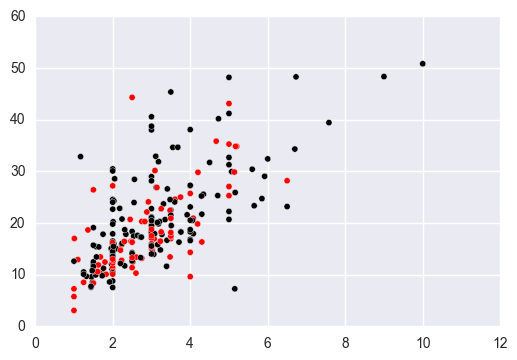

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(tips.tip.values, tips.total_bill.values, c=tips.sex.cat.codes.values, cmap="flag")

## Index

In [82]:
x

      A    B      C
0  0.70    f  False
1  0.29  NaN  False
2  0.23    f  False
3  0.55    m  False
4  0.72    f   True

In [83]:
x.index

RangeIndex(start=0, stop=5, step=1)

In [84]:
x.columns

Index(['A', 'B', 'C'], dtype='object')

In [87]:
y = x.set_index(np.linspace(0,1,5))
y

         A    B      C
0.00  0.70    f  False
0.25  0.29  NaN  False
0.50  0.23    f  False
0.75  0.55    m  False
1.00  0.72    f   True

In [88]:
y.index

Float64Index([0.0, 0.25, 0.5, 0.75, 1.0], dtype='float64')

In [91]:
y.index = ["a1", "b2", "c3", "d4", "e5"]
y

       A    B      C
a1  0.70    f  False
b2  0.29  NaN  False
c3  0.23    f  False
d4  0.55    m  False
e5  0.72    f   True

In [92]:
y.index

Index(['a1', 'b2', 'c3', 'd4', 'e5'], dtype='object')

In [93]:
y.index = ["a", "b", "a", "c", "d"]
y

      A    B      C
a  0.70    f  False
b  0.29  NaN  False
a  0.23    f  False
c  0.55    m  False
d  0.72    f   True

In [94]:
# so these are labels, not identifiers
y.index.is_monotonic, y.index.is_unique

(False, False)

In [95]:
x.index.is_monotonic, x.index.is_unique

(True, True)

In [96]:
# each index can be named
x.index.name = "ROWS"
x.columns.name = "COLS"
x

COLS     A    B      C
ROWS                  
0     0.70    f  False
1     0.29  NaN  False
2     0.23    f  False
3     0.55    m  False
4     0.72    f   True

In [100]:
# hierarchical indexes
y = pd.DataFrame({
        "A": np.round(np.random.uniform(0, 1, 6), 2)
    })

y.index = pd.MultiIndex(
    levels=[["x", "y", "z"], [1,2,3,4]],
    labels=[
            [0,0,0,1,1,2],
            [0,1,3,0,1,2]
    ],
    names = ["top", "bottom"]
)
y

               A
top bottom      
x   1       0.29
    2       0.63
    4       0.09
y   1       0.43
    2       0.43
z   3       0.49

In [101]:
flights = pd.read_csv("http://www.gagolewski.com/resources/data/flights.csv", comment="#")
flights.head(14)

    year      month  passengers
0   1949    January         112
1   1949   February         118
2   1949      March         132
3   1949      April         129
4   1949        May         121
5   1949       June         135
6   1949       July         148
7   1949     August         148
8   1949  September         136
9   1949    October         119
10  1949   November         104
11  1949   December         118
12  1950    January         115
13  1950   February         126

In [102]:
# set index to consist of years and months
flights.set_index(['year', 'month']).head(14)

                passengers
year month                
1949 January           112
     February          118
     March             132
     April             129
     May               121
     June              135
     July              148
     August            148
     September         136
     October           119
     November          104
     December          118
1950 January           115
     February          126

In [105]:
# list of pairs like (year, month)
#tuples = [(1949, "J"), (1949, "F"), ...]
tuples = list(zip(flights.year, flights.month))
tuples[:4]

[(1949, 'January'), (1949, 'February'), (1949, 'March'), (1949, 'April')]

In [107]:
flights2 = flights.copy()
flights2.index = pd.MultiIndex.from_tuples(
    tuples
)
flights2.index.names = ["year", "month"]
flights2 = pd.DataFrame(flights2.passengers)
flights2.head(14)

                passengers
year month                
1949 January           112
     February          118
     March             132
     April             129
     May               121
     June              135
     July              148
     August            148
     September         136
     October           119
     November          104
     December          118
1950 January           115
     February          126

## Indexing (subsetting) Series and DataFrame objects

In [109]:
np.random.seed(123)
b = pd.Series(np.round(np.random.uniform(0,1,10),2))
i = np.r_[0:10]
np.random.shuffle(i)
b.index = i
b

2    0.70
1    0.29
8    0.23
7    0.55
9    0.72
4    0.42
5    0.98
6    0.68
3    0.48
0    0.39
dtype: float64

In [110]:
c = b.copy()
c.index = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
c

a    0.70
b    0.29
c    0.23
d    0.55
e    0.72
f    0.42
g    0.98
h    0.68
i    0.48
j    0.39
dtype: float64

In [111]:
# never do this:
b[0:1] # position-based

2    0.7
dtype: float64

In [112]:
b[0:5:2]

2    0.70
8    0.23
9    0.72
dtype: float64

In [113]:
b[b.values > 0.7]

9    0.72
5    0.98
dtype: float64

In [114]:
b[0] # label based (wtf?!)

0.39000000000000001

In [115]:
b[ [0, 1] ]

0    0.39
1    0.29
dtype: float64

In [116]:
# loc (label) and iloc (positional) attributes
b.loc[0]

0.39000000000000001

In [117]:
b.iloc[0]

0.69999999999999996

In [118]:
b.iloc[1:7]

1    0.29
8    0.23
7    0.55
9    0.72
4    0.42
5    0.98
dtype: float64

In [119]:
b.loc[1:7]

1    0.29
8    0.23
7    0.55
dtype: float64

In [120]:
c.loc["c":"g"]

c    0.23
d    0.55
e    0.72
f    0.42
g    0.98
dtype: float64

In [122]:
c.loc["c":"a":-1]

c    0.23
b    0.29
a    0.70
dtype: float64

In [123]:
c.loc[ c.values > 0.7 ] # bool vector-based subsetting

e    0.72
g    0.98
dtype: float64

In [124]:
c.iloc[ c.values > 0.7 ] # equivalent

e    0.72
g    0.98
dtype: float64

In [127]:
b.loc[ [1, 3, 5] ]

1    0.29
3    0.48
5    0.98
dtype: float64

In [128]:
b.iloc[ [1, 3, 5] ]

1    0.29
7    0.55
4    0.42
dtype: float64

In [129]:
c.loc[["a", "b", "c"]]

a    0.70
b    0.29
c    0.23
dtype: float64

In [130]:
birth_dates2 = birth_dates.set_index("BirthDate")
birth_dates2.head()

                        Name
BirthDate                   
2000-12-06    Hung Hyun-Seok
1918-12-31  Benno Blumenthal
1958-06-26  Paitoon Ornwimol
1947-10-07    P'yon Yong-Sun
1983-04-09    Étienne Chaney

In [133]:
birth_dates2.loc["1918-12-31"]

                        Name
BirthDate                   
1918-12-31  Benno Blumenthal

In [134]:
birth_dates2.loc["1918-12-31":"1925-01-01"]

                          Name
BirthDate                     
1918-12-31    Benno Blumenthal
1921-12-19       Nedeljko Bukv
1923-03-30  Gordan Mislopoljac
1921-11-06    Eufebio Mascioli
1924-07-31       Sawa Mobumasu
1922-11-10     Nishioka Nissho

In [149]:
import pandas.tseries.offsets
# gimme the names of people at least 16 y.o.
birth_dates2.head(12)
def old_enough(d, today, y):
    # d - data frame like birth_dates2
    # today - a string like "2017-01-30"
    # y - e.g., 16
    which = d.index <= pd.to_datetime(today) - pandas.tseries.offsets.DateOffset(years=y)
    return d.iloc[which]

In [160]:
dates = "2000-02-27"
d = pd.DataFrame(
    {"Name": ["A", "B", "C", "D", "E"]},
   index = pd.date_range(dates, periods=5, freq="D")
)
d

           Name
2000-02-27    A
2000-02-28    B
2000-02-29    C
2000-03-01    D
2000-03-02    E

In [162]:
old_enough(d, "2018-02-28", 18)

           Name
2000-02-27    A
2000-02-28    B

In [163]:
y

               A
top bottom      
x   1       0.29
    2       0.63
    4       0.09
y   1       0.43
    2       0.43
z   3       0.49

In [164]:
y.A

top  bottom
x    1         0.29
     2         0.63
     4         0.09
y    1         0.43
     2         0.43
z    3         0.49
Name: A, dtype: float64

In [165]:
y.A.loc["x"]

bottom
1    0.29
2    0.63
4    0.09
Name: A, dtype: float64

In [166]:
y.A.loc[["y","x"]]

top  bottom
x    1         0.29
     2         0.63
     4         0.09
y    1         0.43
     2         0.43
Name: A, dtype: float64

In [167]:
y.A.loc[["y","x"], [2, 1]]

top  bottom
x    1         0.29
     2         0.63
y    1         0.43
     2         0.43
Name: A, dtype: float64

In [168]:
y.A.loc[[ ("x", 1), ("y", 2)]]

top  bottom
x    1         0.29
y    2         0.43
Name: A, dtype: float64

In [169]:
flights.head()

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [170]:
# flights[rows,cols] --- don't use it!
flights.iloc[:4, 0] # first 4 rows, first column

0    1949
1    1949
2    1949
3    1949
Name: year, dtype: int64

In [173]:
flights.loc[:,"year"].iloc[::12]

0      1949
12     1950
24     1951
36     1952
48     1953
60     1954
72     1955
84     1956
96     1957
108    1958
120    1959
132    1960
Name: year, dtype: int64

In [174]:
tips.head()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [175]:
tips.loc[:,"sex":"day"].head()

      sex smoker  day
0  Female     No  Sun
1    Male     No  Sun
2    Male     No  Sun
3    Male     No  Sun
4  Female     No  Sun

In [181]:
# partition the tips d.f.
# create two data frames: tips_train (80%) and tips_test (20%)
i = np.random.permutation(np.arange(tips.shape[0]))
k = int(len(i)*0.8)
tips_train = tips.iloc[i[:k]]
tips_test = tips.iloc[i[k:]]
len(tips), len(tips_train), len(tips_test)

(244, 195, 49)

In [185]:
tips_train = tips.sample(frac=0.8, random_state=123) # setting seed with random_state
tips_test = tips.iloc[~tips.index.isin(tips_train.index), :]
len(tips), len(tips_train), len(tips_test)

(244, 195, 49)

In [194]:
tips.loc[tips.tip>5.0,:]

     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
44        30.40   5.60    Male     No   Sun  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
52        34.81   5.20  Female     No   Sun  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
85        34.83   5.17  Female     No  Thur   Lunch     4
88        24.71   5.85    Male     No  Thur   Lunch     2
116       29.93   5.07    Male     No   Sun  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
155       29.85   5.14  Female     No   Sun  Dinner     5
170       50.81  10.00    Male    Yes   Sat  Dinner     3
172        7.25   5.15    Male    Yes   Sun  Dinner     2
181       23.33   5.65    Male    Yes   Sun  Dinner     2
183       23.17   6.50    Male    Yes   Sun  Dinner     4
211       25.89   5.16    Male    Yes   Sat  Dinner     4
212       48.33   9.00    Male     No   Sat  Dinner     4
214       28.1

In [202]:
# for the tips data frame
# choose only Male data
# tips.loc[tips.sex == "Male",:]

# choose only total_bill in interval [10,20]
#tips.loc[(tips.total_bill>=10) & (tips.total_bill<=20),:]

# choose Sat and Sun data with tip > 5
#tips.loc[tips.day.isin(["Sun", "Sat"]) & (tips.tip > 5)]

In [204]:
# adding new columns
x["D"] = x["A"]*2.0-1
x

COLS     A    B      C     D
ROWS                        
0     0.70    f  False  0.40
1     0.29  NaN  False -0.42
2     0.23    f  False -0.54
3     0.55    m  False  0.10
4     0.72    f   True  0.44

In [205]:
x.E = x["A"]*2.0-1
x

COLS     A    B      C     D
ROWS                        
0     0.70    f  False  0.40
1     0.29  NaN  False -0.42
2     0.23    f  False -0.54
3     0.55    m  False  0.10
4     0.72    f   True  0.44

In [207]:
x.insert(1, "E", x["A"]*2.0-1)
x

COLS     A     E    B      C     D
ROWS                              
0     0.70  0.40    f  False  0.40
1     0.29 -0.42  NaN  False -0.42
2     0.23 -0.54    f  False -0.54
3     0.55  0.10    m  False  0.10
4     0.72  0.44    f   True  0.44

In [209]:
x = x.drop(["D", "E"], axis=1) # returns a new df
x

COLS     A    B      C
ROWS                  
0     0.70    f  False
1     0.29  NaN  False
2     0.23    f  False
3     0.55    m  False
4     0.72    f   True

In [210]:
x.loc[9] = [0.4, "m", True]
x

COLS     A    B      C
ROWS                  
0     0.70    f  False
1     0.29  NaN  False
2     0.23    f  False
3     0.55    m  False
4     0.72    f   True
9     0.40    m   True

In [211]:
x = x.drop([9], axis=0)
x

COLS     A    B      C
ROWS                  
0     0.70    f  False
1     0.29  NaN  False
2     0.23    f  False
3     0.55    m  False
4     0.72    f   True

In [214]:
2*x.A

ROWS
0    1.40
1    0.58
2    0.46
3    1.10
4    1.44
Name: A, dtype: float64

In [216]:
x.A + x.A.iloc[ [3,2,0,1,4] ]  # label-wise op!!!!!

ROWS
0    1.40
1    0.58
2    0.46
3    1.10
4    1.44
Name: A, dtype: float64

In [218]:
x.A.values + x.A.iloc[ [3,2,0,1,4] ].values 

array([ 1.25,  0.52,  0.93,  0.84,  1.44])

In [222]:
x.A.iloc[1:] + x.A.iloc[:-1]

ROWS
0     NaN
1    0.58
2    0.46
3    1.10
4     NaN
Name: A, dtype: float64

In [223]:
x.A.iloc[1:].values + x.A.iloc[:-1].values

array([ 0.99,  0.52,  0.78,  1.27])

In [228]:
x.A + pd.Series([10,100,1000], index=[0,0,0])

0      10.7
0     100.7
0    1000.7
1       NaN
2       NaN
3       NaN
4       NaN
dtype: float64

In [229]:
np.exp(x.A)

ROWS
0    2.013753
1    1.336427
2    1.258600
3    1.733253
4    2.054433
Name: A, dtype: float64

In [230]:
x.A.apply(lambda v: "t" if v > 0.5 else "f")

ROWS
0    t
1    f
2    f
3    t
4    t
Name: A, dtype: object

In [231]:
np.mean(x.A)

0.49800000000000005

In [232]:
x.A.mean()

0.49800000000000005

In [234]:
# std(ddof=1), var, min, max, meadian
x.A.describe()

count    5.000000
mean     0.498000
std      0.227969
min      0.230000
25%      0.290000
50%      0.550000
75%      0.700000
max      0.720000
Name: A, dtype: float64

In [235]:
x.B.describe()

count     4
unique    2
top       f
freq      3
Name: B, dtype: object

In [238]:
tips.groupby("sex").mean()

        total_bill       tip      size
sex                                   
Female   18.056897  2.833448  2.459770
Male     20.744076  3.089618  2.630573

In [239]:
tips.groupby(["sex", "smoker"]).mean()

               total_bill       tip      size
sex    smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

In [241]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [243]:
pd.pivot_table(tips, values=["total_bill", "tip"], 
               index=["day", "sex"], aggfunc="median")

               tip  total_bill
day  sex                      
Fri  Female  3.000      15.380
     Male    2.600      17.215
Sat  Female  2.625      18.360
     Male    3.000      18.240
Sun  Female  3.500      17.410
     Male    3.085      20.725
Thur Female  2.005      13.785
     Male    2.530      16.975

In [244]:
pd.crosstab(tips.smoker, tips.sex)

sex     Female  Male
smoker              
No          54    97
Yes         33    60

In [248]:
weather = pd.read_csv(
    "~/Projects/gagolewski.com/www/resources/data/nycflights13_weather.csv.gz",
    comment="#")
weather.head()

  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2  37.94  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3  37.94  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4  37.94  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib            time_hour  
0  11.918651     0.0    1013.9   10.0  2013-01-01 01:00:00  
1  15.891535     0.0    1013.0   10.0  2013-01-01 02:00:00  
2  14.567241     0.0    1012.6   10.0  2013-01-01 03:00:00  
3  15.891535     0.0    1012.7   10.0  2013-01-01 04:00:00  
4  17.215830     0.0    1012.8   10.0  2013-01-01 05:00:00  

With `nycflights13::weather`:

* Convert temperature to Celsius.

In [250]:
weather["tempC"] = (weather["temp"]-32.0)*5.0/9.0
weather.head()

  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2  37.94  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3  37.94  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4  37.94  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib            time_hour  tempC  
0  11.918651     0.0    1013.9   10.0  2013-01-01 01:00:00    2.8  
1  15.891535     0.0    1013.0   10.0  2013-01-01 02:00:00    2.8  
2  14.567241     0.0    1012.6   10.0  2013-01-01 03:00:00    3.3  
3  15.891535     0.0    1012.7   10.0  2013-01-01 04:00:00    3.3  
4  17.215830     0.0    1012.8   10.0  2013-01-01 05:00:00    3.3  

* Compute daily mean temperatures. 

In [255]:
#weather.groupby(["month", "day"]).mean().tempC
daily_means = weather.loc[:,["tempC", "month", "day"]].groupby(["month", "day"]).mean()
daily_means.head()

              tempC
month day          
1     1    3.813043
      2   -1.833333
      3   -1.308333
      4    1.254167
      5    2.845833

* Choose days with greater mean temperature than in the preceding day. 

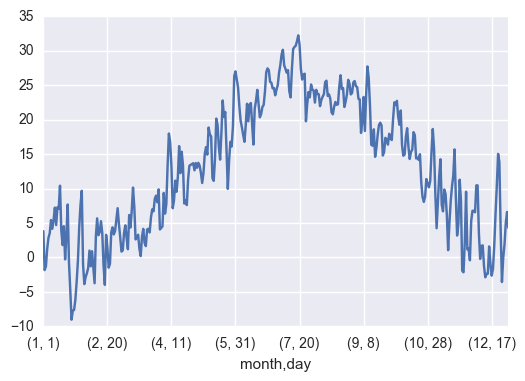

In [262]:
diffs = daily_means.tempC.diff(1)
daily_means.tempC.loc[diffs>0.0]
daily_means.tempC.plot()

* Find 5 hottest days.

In [257]:
daily_means.sort_values(ascending=False, by="tempC").iloc[:5]

               tempC
month day           
7     19   32.233333
      18   31.395833
      20   30.912500
      17   30.719444
      16   30.548611

In [258]:
daily_means.tempC.nlargest(5)

month  day
7      19     32.233333
       18     31.395833
       20     30.912500
       17     30.719444
       16     30.548611
Name: tempC, dtype: float64

In [263]:
airports = pd.read_csv(
    "~/Projects/gagolewski.com/www/resources/data/nycflights13_airports.csv.gz",
    comment="#")
airports.head()

   faa                           name        lat        lon   alt  tz dst  \
0  04G              Lansdowne Airport  41.130472 -80.619583  1044  -5   A   
1  06A  Moton Field Municipal Airport  32.460572 -85.680028   264  -6   A   
2  06C            Schaumburg Regional  41.989341 -88.101243   801  -6   A   
3  06N                Randall Airport  41.431912 -74.391561   523  -5   A   
4  09J          Jekyll Island Airport  31.074472 -81.427778    11  -5   A   

              tzone  
0  America/New_York  
1   America/Chicago  
2   America/Chicago  
3  America/New_York  
4  America/New_York  

In [264]:
airlines = pd.read_csv(
    "~/Projects/gagolewski.com/www/resources/data/nycflights13_airlines.csv.gz",
    comment="#")
airlines.head()

  carrier                    name
0      9E       Endeavor Air Inc.
1      AA  American Airlines Inc.
2      AS    Alaska Airlines Inc.
3      B6         JetBlue Airways
4      DL    Delta Air Lines Inc.

In [265]:
planes = pd.read_csv(
    "~/Projects/gagolewski.com/www/resources/data/nycflights13_planes.csv.gz",
    comment="#")
planes.head()

  tailnum    year                     type      manufacturer      model  \
0  N10156  2004.0  Fixed wing multi engine           EMBRAER  EMB-145XR   
1  N102UW  1998.0  Fixed wing multi engine  AIRBUS INDUSTRIE   A320-214   
2  N103US  1999.0  Fixed wing multi engine  AIRBUS INDUSTRIE   A320-214   
3  N104UW  1999.0  Fixed wing multi engine  AIRBUS INDUSTRIE   A320-214   
4  N10575  2002.0  Fixed wing multi engine           EMBRAER  EMB-145LR   

   engines  seats  speed     engine  
0        2     55    NaN  Turbo-fan  
1        2    182    NaN  Turbo-fan  
2        2    182    NaN  Turbo-fan  
3        2    182    NaN  Turbo-fan  
4        2     55    NaN  Turbo-fan  

In [266]:
flights = pd.read_csv(
    "~/Projects/gagolewski.com/www/resources/data/nycflights13_flights.csv.gz",
    comment="#")
flights.head()

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute            time_hour  
0      1400     5      15  2013-01-01 05:00:00  
1      1416 

In [267]:
# planes, flights, weather, airports, airlines
import sqlite3
conn = sqlite3.connect("/tmp/nycflights13.db") # file path
airports.to_sql("airports", conn)
flights.to_sql("flights", conn)
weather.to_sql("weather", conn)
planes.to_sql("planes", conn)
airlines.to_sql("airlines", conn)

pd.read_sql_query("""
SELECT DISTINCT type, engine FROM planes
""", conn)

1. `SELECT DISTINCT engine FROM planes`

In [273]:
pd.DataFrame(planes.engine.unique(), columns=["engine"])

          engine
0      Turbo-fan
1      Turbo-jet
2  Reciprocating
3        4 Cycle
4    Turbo-shaft
5     Turbo-prop

2. `SELECT DISTINCT type, engine FROM planes`

In [283]:
planes.loc[:,["type", "engine"]].drop_duplicates().reset_index(drop=True)

                       type         engine
0   Fixed wing multi engine      Turbo-fan
1   Fixed wing multi engine      Turbo-jet
2  Fixed wing single engine  Reciprocating
3   Fixed wing multi engine  Reciprocating
4  Fixed wing single engine        4 Cycle
5                Rotorcraft    Turbo-shaft
6   Fixed wing multi engine     Turbo-prop

3. `SELECT COUNT(*), engine FROM planes GROUP BY engine`

In [286]:
pd.DataFrame(planes.engine.value_counts())

               engine
Turbo-fan        2750
Turbo-jet         535
Reciprocating      28
Turbo-shaft         5
4 Cycle             2
Turbo-prop          2

4. `SELECT COUNT(*), engine, type FROM planes GROUP BY engine, type`

In [293]:
planes.pivot_table(index=["engine", "type"],values="engines",aggfunc=len).reset_index()

          engine                      type  engines
0        4 Cycle  Fixed wing single engine        2
1  Reciprocating   Fixed wing multi engine        5
2  Reciprocating  Fixed wing single engine       23
3      Turbo-fan   Fixed wing multi engine     2750
4      Turbo-jet   Fixed wing multi engine      535
5     Turbo-prop   Fixed wing multi engine        2
6    Turbo-shaft                Rotorcraft        5

In [295]:
planes.groupby(["engine", "type"]).size().reset_index()

          engine                      type     0
0        4 Cycle  Fixed wing single engine     2
1  Reciprocating   Fixed wing multi engine     5
2  Reciprocating  Fixed wing single engine    23
3      Turbo-fan   Fixed wing multi engine  2750
4      Turbo-jet   Fixed wing multi engine   535
5     Turbo-prop   Fixed wing multi engine     2
6    Turbo-shaft                Rotorcraft     5

5. `SELECT MIN(year), AVG(year), MAX(year), engine, manufacturer FROM planes GROUP BY engine, manufacturer`

In [302]:
planes.groupby(
    ["engine", "manufacturer"]
)["year"].describe().unstack().loc[:,["min", "mean", "max"]].dropna().reset_index().head()

          engine        manufacturer     min         mean     max
0        4 Cycle              CESSNA  1975.0  1975.000000  1975.0
1  Reciprocating  AVIAT AIRCRAFT INC  2007.0  2007.000000  2007.0
2  Reciprocating              CESSNA  1959.0  1971.142857  1983.0
3  Reciprocating  CIRRUS DESIGN CORP  2007.0  2007.000000  2007.0
4  Reciprocating         DEHAVILLAND  1959.0  1959.000000  1959.0

In [307]:
myaggfunc = lambda x: (np.min(x)+np.max(x))*0.5
myaggfunc.__name__ = "midrange"

planes.groupby(
    ["engine", "manufacturer"]
)["year"].agg([np.min, np.mean, np.max, myaggfunc]).dropna().reset_index().head()

          engine        manufacturer    amin         mean    amax  midrange
0        4 Cycle              CESSNA  1975.0  1975.000000  1975.0    1975.0
1  Reciprocating  AVIAT AIRCRAFT INC  2007.0  2007.000000  2007.0    2007.0
2  Reciprocating              CESSNA  1959.0  1971.142857  1983.0    1971.0
3  Reciprocating  CIRRUS DESIGN CORP  2007.0  2007.000000  2007.0    2007.0
4  Reciprocating         DEHAVILLAND  1959.0  1959.000000  1959.0    1959.0

6. `SELECT * FROM planes WHERE speed IS NOT NULL`

In [311]:
planes.loc[~planes.speed.isnull()].reset_index(drop=True)

   tailnum    year                      type       manufacturer        model  \
0   N201AA  1959.0  Fixed wing single engine             CESSNA          150   
1   N202AA  1980.0   Fixed wing multi engine             CESSNA         421C   
2   N350AA  1980.0   Fixed wing multi engine              PIPER    PA-31-350   
3   N364AA  1973.0   Fixed wing multi engine             CESSNA         310Q   
4   N378AA  1963.0  Fixed wing single engine             CESSNA         172E   
5   N381AA  1956.0   Fixed wing multi engine            DOUGLAS       DC-7BF   
6   N425AA  1968.0  Fixed wing single engine              PIPER    PA-28-180   
7   N508AA  1975.0                Rotorcraft               BELL         206B   
8   N519MQ  1983.0  Fixed wing single engine             CESSNA        A185F   
9   N525AA  1980.0   Fixed wing multi engine              PIPER    PA-31-350   
10  N545AA  1976.0  Fixed wing single engine              PIPER   PA-32R-300   
11  N567AA  1959.0  Fixed wing single en

7. `SELECT tailnum FROM planes WHERE year >= 2010`

In [313]:
planes.tailnum.loc[planes.year >= 2010].head()

88     N127UW
89     N128UW
215    N150UW
216    N151UW
218    N152UW
Name: tailnum, dtype: object

8. `SELECT tailnum FROM planes WHERE seats BETWEEN 100 and 200 LIMIT 20`

In [314]:
planes.tailnum.loc[(planes.seats >= 100) & (planes.seats <= 200)].head(20)

1     N102UW
2     N103US
3     N104UW
5     N105UW
6     N107US
7     N108UW
8     N109UW
9     N110UW
33    N111US
34    N11206
35    N112US
36    N113UW
37    N114UW
46    N117UW
47    N118US
48    N119US
51    N12109
52    N12114
53    N12116
55    N12125
Name: tailnum, dtype: object

9. `SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER")`

In [316]:
planes.loc[planes.manufacturer.isin(["BOEING", "AIRBUS", "EMBRAER"])].head()

   tailnum    year                     type manufacturer      model  engines  \
0   N10156  2004.0  Fixed wing multi engine      EMBRAER  EMB-145XR        2   
4   N10575  2002.0  Fixed wing multi engine      EMBRAER  EMB-145LR        2   
10  N11106  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR        2   
11  N11107  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR        2   
12  N11109  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR        2   

    seats  speed     engine  
0      55    NaN  Turbo-fan  
4      55    NaN  Turbo-fan  
10     55    NaN  Turbo-fan  
11     55    NaN  Turbo-fan  
12     55    NaN  Turbo-fan  

10. `SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER") AND seats>300`

In [318]:
planes.loc[planes.manufacturer.isin(["BOEING", "AIRBUS", "EMBRAER"]) & (planes.seats>300)].head()

    tailnum    year                     type manufacturer    model  engines  \
49   N1200K  1998.0  Fixed wing multi engine       BOEING  767-332        2   
50   N1201P  1998.0  Fixed wing multi engine       BOEING  767-332        2   
69   N121DE  1987.0  Fixed wing multi engine       BOEING  767-332        2   
117  N136DL  1991.0  Fixed wing multi engine       BOEING  767-332        2   
122  N137DL  1991.0  Fixed wing multi engine       BOEING  767-332        2   

     seats  speed     engine  
49     330    NaN  Turbo-fan  
50     330    NaN  Turbo-fan  
69     330    NaN  Turbo-fan  
117    330    NaN  Turbo-fan  
122    330    NaN  Turbo-fan  